DESCRIPTION

Background of Problem Statement :
    
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. 
Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering,
collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. 
The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. 
Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.


Problem Objective :
    
Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
Domain: Entertainment
    
    
Analysis Tasks to be performed:
    
Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

User Age Distribution

User rating of the movie “Toy Story”

Top 25 movies by viewership rating

Find the ratings for all the movies reviewed by for a particular user of user id = 2696


Feature Engineering:

Use column genres:
Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

Determine the features affecting the ratings of any particular movie.

Develop an appropriate model to predict the movie ratings

## IMPORT LIBRARIES AND DATASETS

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

In [2]:
ratings_header = "UserID::MovieID::Rating::Timestamp".split("::")
users_header = "UserID::Gender::Age::Occupation::Zip-code".split("::")
movies_header = "MovieID::Title::Genres".split("::")

In [3]:
print(ratings_header)
print(users_header)
print(movies_header)

['UserID', 'MovieID', 'Rating', 'Timestamp']
['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
['MovieID', 'Title', 'Genres']


In [4]:
path = "D:/Pro/02-Artificial-Intelligence-Course/01-DataScienceWithPython/02-Projects/Project-Movielens/dataset/"

ratings = pd.read_csv(path+'ratings.dat',sep="::",names=ratings_header, parse_dates=["Timestamp"])

movies = pd.read_csv(path+'movies.dat', sep="::",names=movies_header)

users = pd.read_csv(path+'users.dat', sep="::",names=users_header)

D:\Software-Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software-Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
D:\Software-Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this war

In [5]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
print(ratings.isna().sum())
print()
print(movies.isna().sum())
print()
print(users.isna().sum())

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

MovieID    0
Title      0
Genres     0
dtype: int64

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [9]:
print(movies.shape)
print()
print(ratings.shape)
print()
print(users.shape)

(3883, 3)

(1000209, 4)

(6040, 5)


In [10]:
len(movies['MovieID'].unique())

3883

-----------

## ANALYSIS

In [11]:
movie_and_ratings = pd.merge(movies,ratings, on = "MovieID")

In [12]:
movie_and_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [13]:
print(movies.shape)
print(ratings.shape)
print(movie_and_ratings.shape)

(3883, 3)
(1000209, 4)
(1000209, 6)


In [14]:
master_data = pd.merge(movie_and_ratings, users, on = "UserID")

In [15]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [16]:
master_data.shape

(1000209, 10)

In [17]:
master_data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

------------------------------

## User Age Distribution

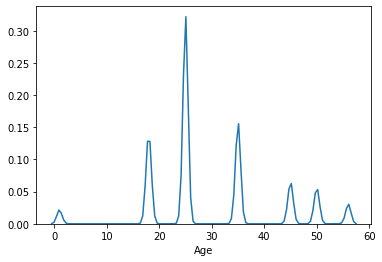

In [18]:
sns.distplot(master_data['Age'], hist=False)

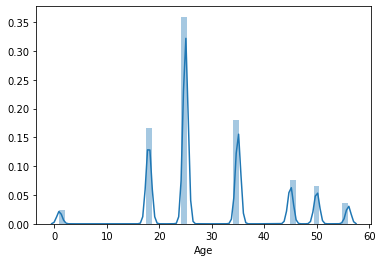

In [19]:
sns.distplot(master_data['Age'], hist=True)

In [20]:
master_data.Age.unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

----------------------------

FROM THE DISPLOT, WE INFER THAT

Most of the users are between 25 to 34 yrs of age

------------------

## User rating of the movie “Toy Story”

In [21]:
ts_data = master_data[master_data.Title == "Toy Story (1995)"]

In [22]:
ts_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [23]:
ts_data.Title.unique()

array(['Toy Story (1995)'], dtype=object)

In [24]:
ts_data['Rating'].describe()

count    2077.000000
mean        4.146846
std         0.852349
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

---------------------------------------

User rating of the movie “Toy Story”

1) The movie has received a total of 2077 ratings.

2) The average rating for the movie is 4 out of 5.

3) The minimum rating for the movie is 1 out of 5 and maximum rating is 5 out of 5

---------------------------------------------

## Top 25 movies by viewership rating

In [25]:
cols = ['MovieID','Title','Rating']

vr_data = master_data[cols]

vr_data.head()

,MovieID,Title,Rating
0,1,Toy Story (1995),5
1,48,Pocahontas (1995),5
2,150,Apollo 13 (1995),5
3,260,Star Wars: Episode IV - A New Hope (1977),4
4,527,Schindler's List (1993),5


In [26]:
vr_data = vr_data.groupby('MovieID')['Rating'].mean().reset_index()

In [27]:
vr_data = vr_data.sort_values(by='Rating',ascending=False).head(25)

In [28]:
vr_final = vr_data.join(master_data[['Title']],on="MovieID",how="left")

In [29]:
vr_final = vr_final[['MovieID','Title','Rating']]
vr_final['Rating'] = vr_final['Rating'].round(2)

In [30]:
vr_final

,MovieID,Title,Rating
926,989,Elizabeth (1998),5.00
3635,3881,"Fugitive, The (1993)",5.00
1652,1830,Fools Rush In (1997),5.00
3152,3382,Blade Runner (1982),5.00
744,787,First Knight (1995),5.00
3054,3280,Babe (1995),5.00
3367,3607,"X-Files: Fight the Future, The (1998)",5.00
3010,3233,Death Becomes Her (1992),5.00
2955,3172,Violets Are Blue... (1986),5.00
3414,3656,"Nutty Professor, The (1963)",5.00


------------------

# The List of top 25 movies based on viewership rating is displayed above

------------------------

## Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [31]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [32]:
master_data[master_data['UserID'] == 2696][['Title','Rating']].sort_values(by="Rating",ascending=False)

,Title,Rating
991036,Lone Star (1996),5
991045,"Devil's Advocate, The (1997)",4
991047,Palmetto (1998),4
991037,Basic Instinct (1992),4
991053,"Talented Mr. Ripley, The (1999)",4
991039,"Shining, The (1980)",4
991051,Psycho (1998),4
991049,"Perfect Murder, A (1998)",4
991042,L.A. Confidential (1997),4
991043,"Game, The (1997)",4


-----------------

## The list of movies rated from high to low by USERID=2696 is listed above

----------

## FEATURE ENGINEERING

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [33]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [34]:
len(master_data.columns)

10

In [35]:
new_master = master_data.copy()
gen_list=[]
for genre in new_master['Genres']:
    gen_str_list = genre.split('|')
    
    gen_list.extend(gen_str_list)
genList = list(set(gen_list))

In [36]:
print(genList)
print(len(genList))

['Horror', 'Drama', 'Comedy', 'Animation', 'Fantasy', 'Crime', 'Thriller', 'Film-Noir', 'Action', 'Romance', 'Musical', 'War', "Children's", 'Mystery', 'Western', 'Adventure', 'Sci-Fi', 'Documentary']
18


In [37]:
for genre in genList:
    new_master[genre] = new_master['Genres'].str.contains(genre)

In [38]:
new_master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Horror', 'Drama', 'Comedy',
       'Animation', 'Fantasy', 'Crime', 'Thriller', 'Film-Noir', 'Action',
       'Romance', 'Musical', 'War', 'Children's', 'Mystery', 'Western',
       'Adventure', 'Sci-Fi', 'Documentary'],
      dtype='object')

In [39]:
len(new_master.columns)

28

In [40]:
new_master.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Action,Romance,Musical,War,Children's,Mystery,Western,Adventure,Sci-Fi,Documentary
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,False,False,False,False,True,False,False,False,False,False
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,False,True,True,False,True,False,False,False,False,False
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,False,False,False,False,False,False,False,False,False,False
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,True,False,False,False,False,False,False,True,True,False
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,False,False,False,True,False,False,False,False,False,False
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067,...,False,False,False,False,True,False,False,False,False,False
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067,...,False,False,True,False,True,False,False,False,False,False
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067,...,False,False,True,False,True,False,False,False,False,False
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067,...,False,False,True,False,True,False,False,False,False,False
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067,...,False,False,False,False,False,False,False,False,False,False


In [41]:
new_master.replace([True,False],[1,0], inplace=True)

In [42]:
new_master

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Action,Romance,Musical,War,Children's,Mystery,Western,Adventure,Sci-Fi,Documentary
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,1,0,1,0,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,0,1,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,0,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,0,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,1,0,0,0,0,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,1,0,0,0,0,0,0,0,0,0


-------------------

## Determine the features affecting the ratings of any particular movie

In [43]:
data = new_master[['Gender','Age','Occupation','Rating']]
data['Gender'].replace(['M','F'],[0,1],inplace=True)
data.head()

D:\Software-Installation\Anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Gender,Age,Occupation,Rating
0,1,1,10,5
1,1,1,10,5
2,1,1,10,5
3,1,1,10,4
4,1,1,10,5


In [44]:
correlations = data.corr()

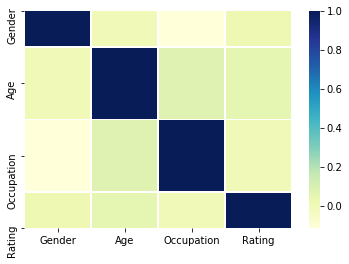

In [45]:
sns.heatmap(data=correlations,linewidths=.5,cmap="YlGnBu")

In [46]:
import matplotlib.pyplot as plt

In [47]:
data[['Gender','Rating']].corr()

,Gender,Rating
Gender,1.000000,0.019861
Rating,0.019861,1.000000


In [48]:
data[['Gender','Rating']].groupby('Gender').describe().unstack()

               Gender
Rating  count  0         753769.000000
               1         246440.000000
        mean   0              3.568879
               1              3.620366
        std    0              1.118724
               1              1.111228
        min    0              1.000000
               1              1.000000
        25%    0              3.000000
               1              3.000000
        50%    0              4.000000
               1              4.000000
        75%    0              4.000000
               1              4.000000
        max    0              5.000000
               1              5.000000
dtype: float64

In [49]:
data[['Age','Rating']].corr()

,Age,Rating
Age,1.000000,0.056869
Rating,0.056869,1.000000


In [50]:
data[['Occupation','Rating']].corr()

,Occupation,Rating
Occupation,1.000000,0.006753
Rating,0.006753,1.000000


---------

Based on our analysis the features - "Gender","Age","Occupation" does not affect the Rating.

----

## Develop an appropriate model to predict the movie ratings

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
new_master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Action,Romance,Musical,War,Children's,Mystery,Western,Adventure,Sci-Fi,Documentary
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,1,0,1,0,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,0,1,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0


In [53]:
new_master.isna().sum()

MovieID        0
Title          0
Genres         0
UserID         0
Rating         0
Timestamp      0
Gender         0
Age            0
Occupation     0
Zip-code       0
Horror         0
Drama          0
Comedy         0
Animation      0
Fantasy        0
Crime          0
Thriller       0
Film-Noir      0
Action         0
Romance        0
Musical        0
War            0
Children's     0
Mystery        0
Western        0
Adventure      0
Sci-Fi         0
Documentary    0
dtype: int64

In [54]:
new_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 28 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null object
Genres         1000209 non-null object
UserID         1000209 non-null int64
Rating         1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null object
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zip-code       1000209 non-null object
Horror         1000209 non-null int64
Drama          1000209 non-null int64
Comedy         1000209 non-null int64
Animation      1000209 non-null int64
Fantasy        1000209 non-null int64
Crime          1000209 non-null int64
Thriller       1000209 non-null int64
Film-Noir      1000209 non-null int64
Action         1000209 non-null int64
Romance        1000209 non-null int64
Musical        1000209 non-null int64
War            1000209 non-null int64
Children's     1000209 non-null int64
Mystery  

In [55]:
data = master_data.drop(['Title','Genres','Zip-code','Timestamp','UserID','MovieID','Genres'],axis=1)

In [56]:
data.columns

Index(['Rating', 'Gender', 'Age', 'Occupation'], dtype='object')

In [57]:
data.Gender.replace(['M','F'],[0,1], inplace=True)

In [58]:
data.head()

,Rating,Gender,Age,Occupation
0,5,1,1,10
1,5,1,1,10
2,5,1,1,10
3,4,1,1,10
4,5,1,1,10


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
Rating        1000209 non-null int64
Gender        1000209 non-null int64
Age           1000209 non-null int64
Occupation    1000209 non-null int64
dtypes: int64(4)
memory usage: 38.2 MB


In [60]:
X = data.drop('Rating',axis=1)
y = data.Rating

In [61]:
X.head()

,Gender,Age,Occupation
0,1,1,10
1,1,1,10
2,1,1,10
3,1,1,10
4,1,1,10


In [62]:
y.head()

0    5
1    5
2    5
3    4
4    5
Name: Rating, dtype: int64

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700146, 3)
(300063, 3)
(700146,)
(300063,)


In [83]:
logReg = LogisticRegression()

In [84]:
logReg.fit(X_train,y_train)

D:\Software-Installation\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software-Installation\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
logReg.intercept_

array([-2.24565965, -1.80462433, -1.02612838, -0.77729588, -1.38519633])

In [86]:
y_pred = logReg.predict(X_test)

In [87]:
print("CLASSIFICATION REPORT")

print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT


D:\Software-Installation\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     16902
           2       0.00      0.00      0.00     32380
           3       0.00      0.00      0.00     78297
           4       0.35      1.00      0.52    105012
           5       0.00      0.00      0.00     67472

    accuracy                           0.35    300063
   macro avg       0.07      0.20      0.10    300063
weighted avg       0.12      0.35      0.18    300063



In [88]:
print("CONFUSION MATRIX")

print(confusion_matrix(y_test,y_pred))

CONFUSION MATRIX
[[     0      0      0  16902      0]
 [     0      0      0  32380      0]
 [     0      0      0  78297      0]
 [     0      0      0 105012      0]
 [     0      0      0  67472      0]]


In [80]:
X.columns

Index(['Gender', 'Age', 'Occupation'], dtype='object')

In [ ]:
# LOGISTIC REGRESSION IS for classification - 0 or 1

# TRY KNN